#  Jaipur Rent Prices Prediction


##  Problem Statement

> In urban areas, rapidly changing housing markets make it difficult for tenants and property owners to estimate fair rental prices. This project aims to build a machine learning model that accurately predicts rental prices based on property features such as location, area, number of BHKs, and furnishing status.  
>
> The goal is to assist both renters and landlords in making data-driven decisions, improving the transparency and efficiency of rental negotiations.


## Real-World Use Case

> **Rental Market Platforms (e.gs, MagicBricks):** Predictive models can help suggest reasonable price ranges for new listings.  
> **Tenants:** Ensure they are not overpaying based on similar listings in the market.  
> **Landlords/Property Managers:** Set competitive rental prices to attract tenants faster.  
> **Real Estate Analysts:** Analyze trends and forecast rental price behavior over time.


## Table of Contents

1. Data Collection  
2. Data Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Pre-modeling Data Preparation
5. Data Splitting 
6. Model Building & Evaluation
7. Conclusion & Insights

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## 1. Data Collection
> In this step we will import the data from the excel file which we have generated by **web scraping** the MagicBricks.com website

In [7]:
df=pd.read_excel('jaipur_rent.xlsx')

In [8]:
df.head()

,Rent,BHK,Furnishing,Tenant Preferred,Carpet Area,Location,Floor
0,"₹26,000",2,Furnished,Bachelors/Family,1230 sqft,Jagatpura Jaipur,3.0
1,"₹20,000",2,Unfurnished,Bachelors/Family,1100 sqft,Mansarovar Jaipur,3.0
2,"₹7,000",1,Semi-Furnished,Bachelors/Family,800 sqft,Manglam City Jaipur,NaN
3,"₹12,000",2,Semi-Furnished,Bachelors/Family,1310 sqft,Vatika Infotech City Jaipur,12.0
4,"₹32,000",2,Furnished,Bachelors/Family,1458 sqft,Jagatpura Jaipur,2.0


#

## 2. Data Preprocessing
> In this phase, we clean and standardize the data to ensure quality and consistency.
> 
> Tasks include handling missing values, correcting data types, removing duplicates, and ensuring uniform formatting.
> 
> Clean data is crucial for reliable analytics and modeling.

##### 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rent              1500 non-null   object 
 1   BHK               1456 non-null   object 
 2   Furnishing        1457 non-null   object 
 3   Tenant Preferred  1500 non-null   object 
 4   Carpet Area       1464 non-null   object 
 5   Location          1500 non-null   object 
 6   Floor             1220 non-null   float64
dtypes: float64(1), object(6)
memory usage: 82.2+ KB


#### 

In [14]:
df.isnull().sum()/df.shape[0]*100

Rent                 0.000000
BHK                  2.933333
Furnishing           2.866667
Tenant Preferred     0.000000
Carpet Area          2.400000
Location             0.000000
Floor               18.666667
dtype: float64

#####

#### Correcting data types

##### Removing rows whose rent is not given

In [18]:
df= df[df['Rent'] != 'Call for Price']

##### Removing ₹ from rent column

In [20]:
df["Rent"] = df["Rent"].str.replace("₹", "").str.replace(",", "").str.strip()

##### Replacing lac by number

In [22]:
df["Rent"] = df["Rent"].str.replace(" Lac", "*100000", regex=False)

In [23]:
df["Rent"] = df["Rent"].map(eval).astype("float")

##### Removing '>' and converting it into float

In [25]:
df['BHK']= df['BHK'].str.replace(">","").astype(float)

##### Removing all non-numeric and converting all of them into sqft & converting it into float

In [27]:
df['Carpet Area']= df['Carpet Area'].str.replace("sqft"," ").str.strip().astype(str)

In [28]:
df['Carpet Area']= df['Carpet Area'].str.replace("sqm","*10.76").str.strip().astype(str)

In [29]:
df['Carpet Area']= df['Carpet Area'].str.replace("sqyrd","*9").str.strip().astype(str)

In [30]:
df['Carpet Area']= df['Carpet Area'].str.replace("nan",'np.nan').str.strip()

In [31]:
df["Carpet Area"] = df["Carpet Area"].map(eval).astype("float")

##### Improve Location column

In [33]:
df['Location']= df['Location'].str.replace("Jaipur","")
df['Location']= df['Location'].str.replace("in","")
df['Location']= df['Location'].apply(lambda x: x.strip())
df['Location']= df['Location'].map(str.upper)

####

##### Filling the missing values 
###### filling the numeric value by median and object type values by mode

In [36]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with most frequent value
    else:
        df[col].fillna(df[col].median(), inplace=True)     # Fill with mean for numeric

In [37]:
df.isnull().sum()/df.shape[0]*100

Rent                0.0
BHK                 0.0
Furnishing          0.0
Tenant Preferred    0.0
Carpet Area         0.0
Location            0.0
Floor               0.0
dtype: float64

#### 

##### Removing Duplicates

In [40]:
df.drop_duplicates(inplace=True)

#

## 3. Exploratory Data Analysis (EDA)

In [43]:
df.describe()

,Rent,BHK,Carpet Area,Floor
count,1430.000000,1430.000000,1430.000000,1430.000000
mean,29101.997203,2.404895,1406.983189,3.361538
std,29029.192581,0.984330,936.520134,2.796590
min,4500.000000,1.000000,25.000000,-1.000000
25%,15000.000000,2.000000,904.000000,1.000000
50%,22000.000000,2.000000,1300.000000,3.000000
75%,35000.000000,3.000000,1700.000000,4.000000
max,480000.000000,10.000000,20000.000000,19.000000


#### Visualization

<Figure size 1200x700 with 0 Axes>

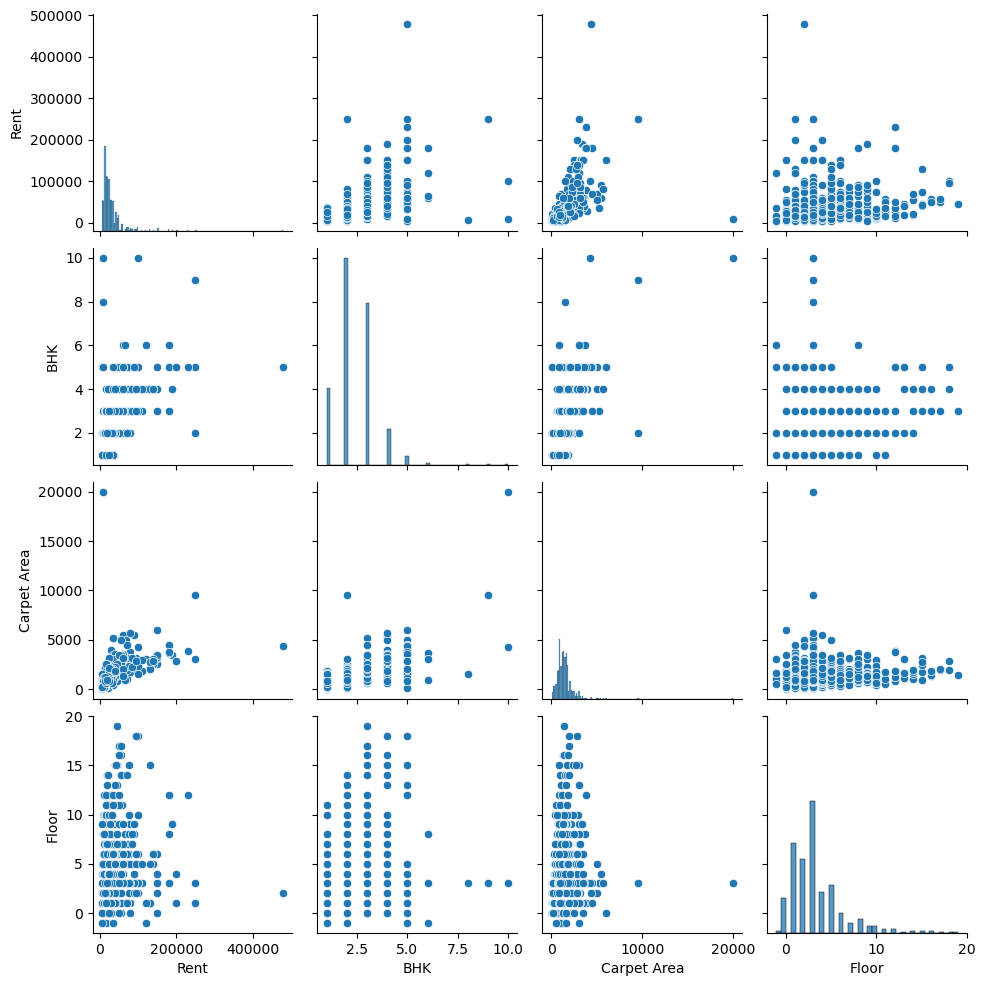

In [45]:
plt.figure(figsize=(12,7))
sns.pairplot(df)
plt.show()

###### 

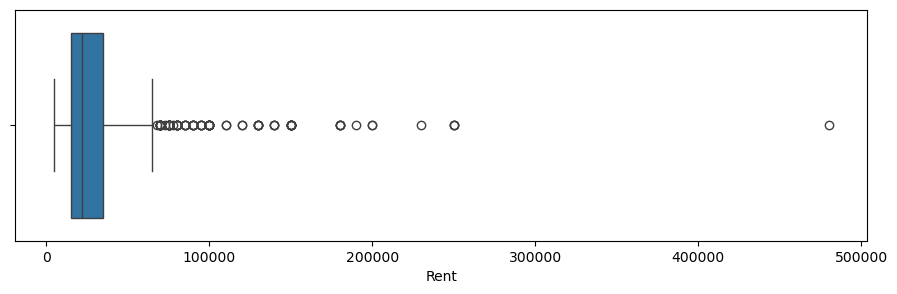

In [47]:
plt.figure(figsize=(11,3))
sns.boxplot(x=df['Rent'])
plt.show()

###### from the above boxplot we can see that there are many outliers present inside the data

##### Removing Outliers 

In [50]:
q1= df['Rent'].quantile(0.25)
q3= df['Rent'].quantile(0.75)

iqr= q3 - q1

minrange= q1 - (1.5*iqr)
maxrange= q3 + (1.5*iqr)

df= df[df['Rent']<= maxrange]

# 

## 4. Pre-modeling Data Preparation

#### Feature Engineering
> Adding a new feature **Price_per_sqft** which is made by dividing Rent by Carpet Area.
> 
> This gives us rent per sqft of the house.
>
> This is a important feature because by this we can estimate the cost better.

In [54]:
df['Price_per_sqft'] = df['Rent'] / df['Carpet Area']

#### 

#### Feature Scaling by MinMaxScaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
ms= MinMaxScaler()

In [59]:
ms.fit(df[['Carpet Area']])

MinMaxScaler()

In [60]:
df['Carpet Area']= ms.transform(df[['Carpet Area']])

#### 

#### One Hot Encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
cat_cols = df.select_dtypes(include=["object"]).columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#### 

#### Correlation-based feature elimination

In [67]:
df.corr()

,Rent,BHK,Carpet Area,Floor,Price_per_sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Location_1RK,...,Location_VED VILLA COLONY,Location_VIDHADHAR NAGAR,Location_VIDHYADHAR NAGAR,Location_VIDYADHAR NAGAR,Location_VIDYUT NAGAR,Location_VIKAS NAGAR,Location_VISHAL NAGAR NIRMAN NAGAR,Location_VIT CAMPUS,Location_VIVEK VIHAR METRO STATION,Location_VRDAWAN DHAM
Rent,1.000000,0.633402,0.461539,0.283753,0.163204,-0.139245,-0.122705,-0.235037,0.131255,-0.033014,...,-0.022137,0.079018,-0.044983,0.007944,-0.012348,-0.018874,-0.014523,-0.007997,-0.003646,-0.025400
BHK,0.633402,1.000000,0.652901,0.198006,-0.082495,0.031651,-0.051653,-0.164012,0.105024,-0.040595,...,-0.040595,0.115015,-0.048705,0.027768,-0.009473,-0.040595,0.021649,-0.009473,-0.009473,-0.040595
Carpet Area,0.461539,0.652901,1.000000,0.090450,-0.295137,0.033039,-0.053546,-0.111463,0.053976,-0.037676,...,-0.027434,0.057597,-0.023849,0.036311,0.003155,-0.010455,0.006558,0.009110,0.009960,-0.003650
Floor,0.283753,0.198006,0.090450,1.000000,0.055093,-0.018207,-0.067417,-0.124175,0.051883,-0.002582,...,-0.022982,-0.002582,-0.027196,-0.005170,-0.022982,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582
Price_per_sqft,0.163204,-0.082495,-0.295137,0.055093,1.000000,-0.117056,-0.033854,0.002414,-0.007120,0.038050,...,0.010640,-0.001601,-0.009607,-0.025091,-0.014188,-0.010412,-0.016874,-0.014468,-0.012615,-0.019223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Location_VIKAS NAGAR,-0.018874,-0.040595,-0.010455,-0.002582,-0.010412,0.032611,-0.012724,-0.027892,-0.009246,-0.000743,...,-0.000743,-0.000743,-0.001823,-0.001488,-0.000743,1.000000,-0.000743,-0.000743,-0.000743,-0.000743
Location_VISHAL NAGAR NIRMAN NAGAR,-0.014523,0.021649,0.006558,-0.002582,-0.016874,-0.022782,0.058391,0.026637,-0.009246,-0.000743,...,-0.000743,-0.000743,-0.001823,-0.001488,-0.000743,-0.000743,1.000000,-0.000743,-0.000743,-0.000743
Location_VIT CAMPUS,-0.007997,-0.009473,0.009110,-0.002582,-0.014468,-0.022782,0.058391,-0.027892,-0.009246,-0.000743,...,-0.000743,-0.000743,-0.001823,-0.001488,-0.000743,-0.000743,-0.000743,1.000000,-0.000743,-0.000743
Location_VIVEK VIHAR METRO STATION,-0.003646,-0.009473,0.009960,-0.002582,-0.012615,-0.022782,0.058391,0.026637,-0.009246,-0.000743,...,-0.000743,-0.000743,-0.001823,-0.001488,-0.000743,-0.000743,-0.000743,-0.000743,1.000000,-0.000743


> from the above corelation we can see that the Furnishing & Tenant feature do not have a good relation with rent so we have to drop them 

###### 

In [70]:
df.drop(columns=['Furnishing_Semi-Furnished',	'Furnishing_Unfurnished'], inplace=True)

In [71]:
df.drop(columns=['Tenant Preferred_Bachelors/Family','Tenant Preferred_Family'], inplace=True)
df.drop(columns=['Floor'], inplace=True)

In [72]:
df

,Rent,BHK,Carpet Area,Price_per_sqft,Location_1RK,Location_200 FEET BYPASS ROAD,Location_22 GODAM,"Location_609, DEVI NAGAR NEW SANGANER ROAD SODALA",Location_ACHARYA VOBA BHAVE NAGAR,Location_ADARSH NAGAR,...,Location_VED VILLA COLONY,Location_VIDHADHAR NAGAR,Location_VIDHYADHAR NAGAR,Location_VIDYADHAR NAGAR,Location_VIDYUT NAGAR,Location_VIKAS NAGAR,Location_VISHAL NAGAR NIRMAN NAGAR,Location_VIT CAMPUS,Location_VIVEK VIHAR METRO STATION,Location_VRDAWAN DHAM
0,26000.0,2.0,0.060325,21.138211,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20000.0,2.0,0.053817,18.181818,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7000.0,1.0,0.038798,8.750000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12000.0,2.0,0.064330,9.160305,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,32000.0,2.0,0.071740,21.947874,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,16000.0,2.0,0.045156,17.259978,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1496,14000.0,2.0,0.058824,11.666667,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1497,12500.0,2.0,0.041552,14.619883,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1498,18500.0,2.0,0.046308,19.473684,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 

### Making .pkl files

In [173]:
import pickle

#### 1. Save the MinMaxScaler

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(ms, f)

#### 2. Save the list of all locations (or other categories, if needed)

In [ ]:
locations = df.columns[df.columns.str.startswith("Location_")].str.replace("Location_", "").tolist()
with open("location.pkl", "wb") as f:
    pickle.dump(locations, f)

#### 3. Save the final feature column names

In [73]:
feature_columns = df.drop(columns=["Rent"]).columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

#

## 5. Data Splitting 

#### Splitting data into X & y

In [77]:
X = df.drop(columns=["Rent"])
y = df["Rent"]

#### Train test splitting 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=121)

# 

## 6. Model Building & Evaluation

######

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

#### Finding best model

In [87]:
models = [
    ('SGD', SGDRegressor(max_iter=5000, eta0=0.01, n_iter_no_change=100)),
    ('Random Forest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('XGB', XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=2, max_depth= 2))
]


for name, model in models:
    print(f"{name}:-")

    model.fit(X_train, y_train)

    y_train_hat = model.predict(X_train)
    print(" Training:")
    print(f"   Acc: {r2_score(y_train, y_train_hat)*100:.2f}")
    print(f"   RMSE: {np.sqrt(mean_squared_error(y_train, y_train_hat)):.2f}\n")
    print('------------------')

    y_test_hat = model.predict(X_test)
    print(" Testing:")
    print(f"   Acc: {r2_score(y_test, y_test_hat)*100:.2f}")
    print(f"   RMSE: {np.sqrt(mean_squared_error(y_test, y_test_hat)):.2f}")
    print()
    print('============================================')


SGD:-
 Training:
   Acc: -331.42
   RMSE: 25309.74

------------------
 Testing:
   Acc: 4.00
   RMSE: 13493.57

Random Forest:-
 Training:
   Acc: 99.56
   RMSE: 807.14

------------------
 Testing:
   Acc: 94.26
   RMSE: 3298.52

KNN:-
 Training:
   Acc: 75.88
   RMSE: 5984.22

------------------
 Testing:
   Acc: 67.85
   RMSE: 7809.10

XGB:-
 Training:
   Acc: 99.17
   RMSE: 1110.89

------------------
 Testing:
   Acc: 96.36
   RMSE: 2627.84



> XGB Regressor has least overfitting as compare to random forest and all other model has less accuracy then these 2 models

##### 

#### Hyper-Parameters tunning 

In [91]:
param = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]
}

##### Randomized Search

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
xgb_regressor = XGBRegressor()
random_search = RandomizedSearchCV(xgb_regressor, param, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_xgbr= random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1}


###### 

In [96]:
y_test_pred= best_xgbr.predict(X_test)
y_train_pred= best_xgbr.predict(X_train)

In [97]:
print('Training: ', r2_score(y_train, y_train_pred)*100,'\n')
print('Testing: ', r2_score(y_test, y_test_pred)*100)

Training:  99.84885421931541 

Testing:  95.86570742516864


###### 

#### Cross-Validation (CV)

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean()*100)

Cross-Validation Scores: [0.96036459 0.94394123 0.98110254 0.98405186 0.95579906]
Mean CV Score: 96.50518558225377


##### 

#### Regression Plot

Text(0, 0.5, 'Predicted')

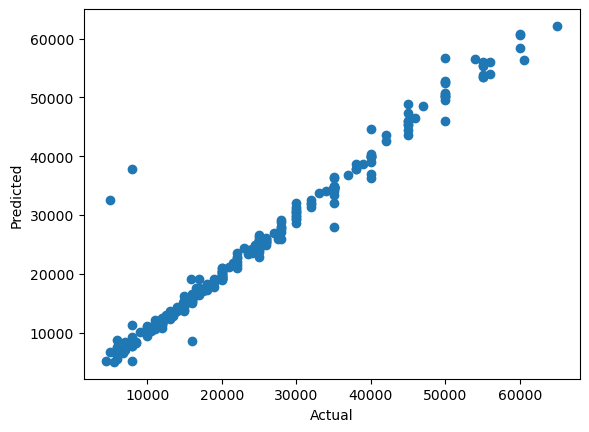

In [104]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

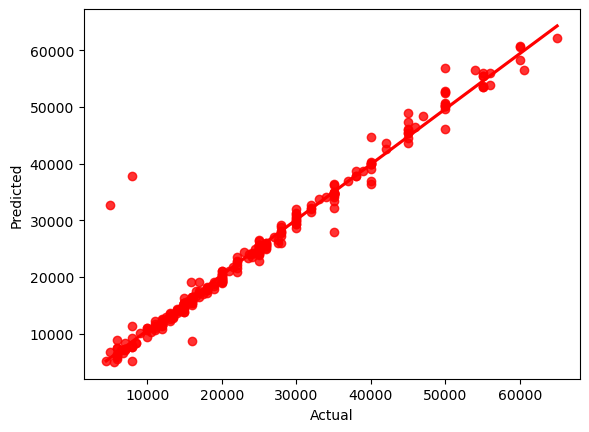

In [105]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 

## 7. Conclusion & Insights

**Project Summary**:
> - Successfully built a machine learning model to predict rental prices using features like location, area, number of BHKs, furnishing status, and floor.
> - Conducted thorough data preprocessing, feature engineering, and model evaluation to ensure reliable performance.

**Key Insights**:
> - Location and area have the strongest influence on rent prices.  
> - Outlier handling and feature scaling significantly improved model accuracy.  
> - Models like Random Forest and XGBoost provided higher R² scores compared to Linear Regression.

**Model Performance**:  
> - The final model achieved an R² score of approximately **98%**.
> - Cross-validation confirmed the model's consistency across different data splits.

**Future Improvements**:  
> - Include more detailed location data (e.g., pin code, proximity to public transport).  
> - Add features like amenities, property age, and nearby landmarks.  
> - Integrate real-time data sources or APIs for dynamic rent prediction.

**Real-World Applications**:  
> - This system can assist tenants in negotiating fair rent.  
> - Property owners can set competitive prices to maximize occupancy.  
> - Real estate platforms can integrate it for smarter listings.


### Saving the model in model.pkl file

In [167]:
with open("model.pkl", "wb") as f:
    pickle.dump(best_xgbr, f)